# **1) Installing Libraries**

In [2]:
!pip install tf-keras==2.15 --quiet
!pip install tensorflow==2.15 --quiet
!pip install keras==2.15 --quiet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 6.2 MB/s eta 0:00:00


# **2) Importing Libraries**

In [3]:
import os
import zipfile
import random
import shutil
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from shutil import copyfile
import matplotlib.pyplot as plt

# **3) Downloading and Extracting Data**

In [4]:
!wget --no-check-certificate \
    "https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_5340.zip" \
    -O "/tmp/cats-and-dogs.zip"

local_zip = '/tmp/cats-and-dogs.zip'
zip_ref   = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

--2024-08-18 10:31:07--  https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_5340.zip
Resolving download.microsoft.com (download.microsoft.com)... 23.44.78.15, 2600:1407:7400:1187::317f, 2600:1407:7400:1184::317f
Connecting to download.microsoft.com (download.microsoft.com)|23.44.78.15|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 824887076 (787M) [application/octet-stream]
Saving to: ‘/tmp/cats-and-dogs.zip’

/tmp/cats-and-dogs. 100%[===================>] 786.67M   107MB/s    in 7.3s    

2024-08-18 10:31:14 (107 MB/s) - ‘/tmp/cats-and-dogs.zip’ saved [824887076/824887076]



# **4) Logging File Sources**

In [5]:
source_path = '/tmp/PetImages'

source_path_dogs = os.path.join(source_path, 'Dog')
source_path_cats = os.path.join(source_path, 'Cat')

# Deletes all non-image files (there are two .db files bundled into the dataset)
!find /tmp/PetImages/ -type f ! -name "*.jpg" -exec rm {} +

# os.listdir returns a list containing all files under the given path
print(f"There are {len(os.listdir(source_path_dogs))} images of dogs.")
print(f"There are {len(os.listdir(source_path_cats))} images of cats.")

There are 12500 images of dogs.
There are 12500 images of cats.


# **5) Specifying Training and Validation Paths**

In [6]:
# Define root directory
root_dir = '/tmp/cats-v-dogs'

# Empty directory to prevent FileExistsError is the function is run several times
if os.path.exists(root_dir):
  shutil.rmtree(root_dir)

def create_train_val_dirs(root_path):
  os.makedirs(os.path.join(root_path, "training/cats"))
  os.makedirs(os.path.join(root_path, "training/dogs"))
  os.makedirs(os.path.join(root_path, "validation/cats"))
  os.makedirs(os.path.join(root_path, "validation/dogs"))

try:
  create_train_val_dirs(root_path=root_dir)
except FileExistsError:
  print("You should not be seeing this since the upper directory is removed beforehand")

# **6) Printing the New Directories:**

In [7]:
for rootdir, dirs, files in os.walk(root_dir):
    for subdir in dirs:
        print(os.path.join(rootdir, subdir))

/tmp/cats-v-dogs/training
/tmp/cats-v-dogs/validation
/tmp/cats-v-dogs/training/cats
/tmp/cats-v-dogs/training/dogs
/tmp/cats-v-dogs/validation/cats
/tmp/cats-v-dogs/validation/dogs


# **7) Specifying Splitting Data Between Validation and Training:**

In [8]:
import math

def split_data(SOURCE_DIR, TRAINING_DIR, VALIDATION_DIR, SPLIT_SIZE):

  dirNames = os.listdir(SOURCE_DIR)
  dirNames = random.sample(dirNames, len(dirNames))

  trainingSample = dirNames[:math.floor(len(dirNames) * SPLIT_SIZE)]
  validationSample = dirNames[math.floor(len(dirNames) * SPLIT_SIZE):]

  for rootDir, dir, files in os.walk(SOURCE_DIR):
    for file in files:
      if os.path.getsize(os.path.join(rootDir, file)) == 0:
        print(f"{file} is zero length, so ignoring.")
      elif file in trainingSample:
        copyfile(os.path.join(rootDir, file), os.path.join(TRAINING_DIR, file))
      elif file in validationSample:
        copyfile(os.path.join(rootDir, file), os.path.join(VALIDATION_DIR, file))

# **8) Splitting the Data:**

In [9]:
# Define paths
CAT_SOURCE_DIR = "/tmp/PetImages/Cat/"
DOG_SOURCE_DIR = "/tmp/PetImages/Dog/"

TRAINING_DIR = "/tmp/cats-v-dogs/training/"
VALIDATION_DIR = "/tmp/cats-v-dogs/validation/"

TRAINING_CATS_DIR = os.path.join(TRAINING_DIR, "cats/")
VALIDATION_CATS_DIR = os.path.join(VALIDATION_DIR, "cats/")

TRAINING_DOGS_DIR = os.path.join(TRAINING_DIR, "dogs/")
VALIDATION_DOGS_DIR = os.path.join(VALIDATION_DIR, "dogs/")

# Empty directories in case you run this cell multiple times
if len(os.listdir(TRAINING_CATS_DIR)) > 0:
  for file in os.scandir(TRAINING_CATS_DIR):
    os.remove(file.path)
if len(os.listdir(TRAINING_DOGS_DIR)) > 0:
  for file in os.scandir(TRAINING_DOGS_DIR):
    os.remove(file.path)
if len(os.listdir(VALIDATION_CATS_DIR)) > 0:
  for file in os.scandir(VALIDATION_CATS_DIR):
    os.remove(file.path)
if len(os.listdir(VALIDATION_DOGS_DIR)) > 0:
  for file in os.scandir(VALIDATION_DOGS_DIR):
    os.remove(file.path)

# Define proportion of images used for training
split_size = .9

split_data(CAT_SOURCE_DIR, TRAINING_CATS_DIR, VALIDATION_CATS_DIR, split_size)
split_data(DOG_SOURCE_DIR, TRAINING_DOGS_DIR, VALIDATION_DOGS_DIR, split_size)

# Your function should perform copies rather than moving images so original directories should contain unchanged images
print(f"\n\nOriginal cat's directory has {len(os.listdir(CAT_SOURCE_DIR))} images")
print(f"Original dog's directory has {len(os.listdir(DOG_SOURCE_DIR))} images\n")

# Training and validation splits
print(f"There are {len(os.listdir(TRAINING_CATS_DIR))} images of cats for training")
print(f"There are {len(os.listdir(TRAINING_DOGS_DIR))} images of dogs for training")
print(f"There are {len(os.listdir(VALIDATION_CATS_DIR))} images of cats for validation")
print(f"There are {len(os.listdir(VALIDATION_DOGS_DIR))} images of dogs for validation")

666.jpg is zero length, so ignoring.
11702.jpg is zero length, so ignoring.


Original cat's directory has 12500 images
Original dog's directory has 12500 images

There are 11249 images of cats for training
There are 11249 images of dogs for training
There are 1250 images of cats for validation
There are 1250 images of dogs for validation


# **9) Defining Training Generators:**

In [10]:

def train_val_generators(TRAINING_DIR, VALIDATION_DIR):
  train_datagen = ImageDataGenerator(rescale=1/255)

  train_generator = train_datagen.flow_from_directory(directory=TRAINING_DIR,
                                                      batch_size=10,
                                                      class_mode="binary",
                                                      target_size=(150, 150))
  
  validation_datagen = ImageDataGenerator(rescale=1/255)
  
  validation_generator = validation_datagen.flow_from_directory(directory=VALIDATION_DIR,
                                                                batch_size=10,
                                                                class_mode="binary",
                                                                target_size=(150, 150))

  return train_generator, validation_generator

# **10) Running the Training Generator:**

In [11]:
train_generator, validation_generator = train_val_generators(TRAINING_DIR, VALIDATION_DIR)

Found 22498 images belonging to 2 classes.
Found 2500 images belonging to 2 classes.


# **11) Defining Model to Train:**

In [12]:
def create_model():
  model = tf.keras.models.Sequential([
      tf.keras.layers.Conv2D(32, (3,3), activation="relu", input_shape=(150, 150, 3)),
      tf.keras.layers.MaxPooling2D(2, 2),
      tf.keras.layers.Conv2D(64, (3,3), activation="relu"),
      tf.keras.layers.MaxPooling2D(2, 2),
      tf.keras.layers.Conv2D(128, (3,3), activation="relu"),
      tf.keras.layers.MaxPooling2D(2, 2),
      tf.keras.layers.Flatten(),
      tf.keras.layers.Dense(128, activation="relu"),
      tf.keras.layers.Dense(1, activation="sigmoid")
  ])

  model.compile(optimizer="adam",
                loss="mean_squared_error",
                metrics=['accuracy'])

  return model

# **12) Training the Model:**

In [14]:
model = create_model()

class MyCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if logs.get('accuracy') is not None and logs.get('accuracy') > 0.95 \
      and logs.get("val_accuracy") is not None and logs.get("val_accuracy") > 0.8:
      print("\nReached 95% accuracy so cancelling training!")
      self.model.stop_training = True

callbacks = MyCallback()

history = model.fit(train_generator,
                    epochs=15,
                    verbose=1,
                    validation_data=validation_generator,
                    callbacks=[callbacks])

Epoch 1/15
2250/2250 [==============================] - 121s 54ms/step - loss: 0.2048 - accuracy: 0.6711 - val_loss: 0.1750 - val_accuracy: 0.7324
Epoch 2/15
2250/2250 [==============================] - 117s 52ms/step - loss: 0.1498 - accuracy: 0.7835 - val_loss: 0.1389 - val_accuracy: 0.8068
Epoch 3/15
2250/2250 [==============================] - 117s 52ms/step - loss: 0.1202 - accuracy: 0.8335 - val_loss: 0.1407 - val_accuracy: 0.7972
Epoch 4/15
2250/2250 [==============================] - 118s 53ms/step - loss: 0.0929 - accuracy: 0.8727 - val_loss: 0.1294 - val_accuracy: 0.8140
Epoch 5/15
2250/2250 [==============================] - 118s 52ms/step - loss: 0.0634 - accuracy: 0.9158 - val_loss: 0.1284 - val_accuracy: 0.8268
Epoch 6/15
2250/2250 [==============================] - 119s 53ms/step - loss: 0.0420 - accuracy: 0.9476 - val_loss: 0.1327 - val_accuracy: 0.8232
Epoch 7/15
2249/2250 [============================>.] - ETA: 0s - loss: 0.0307 - accuracy: 0.9627
Reached 95% accuracy

# **13) Plotting Logs:**

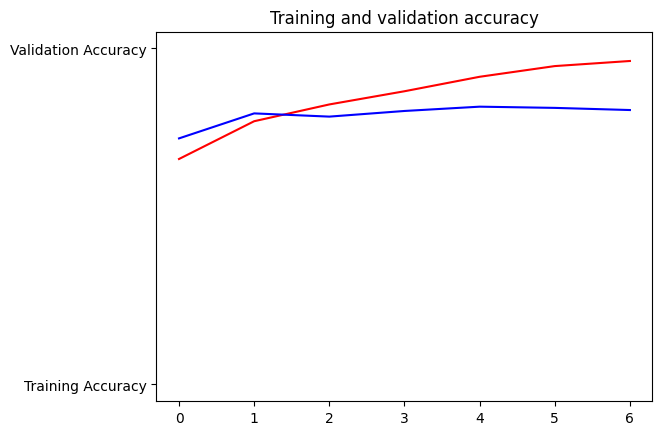

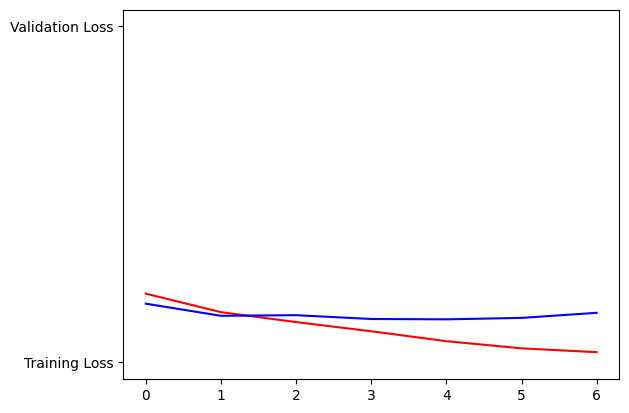

In [15]:
#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot(epochs, acc, 'r', "Training Accuracy")
plt.plot(epochs, val_acc, 'b', "Validation Accuracy")
plt.title('Training and validation accuracy')
plt.show()
print("")

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot(epochs, loss, 'r', "Training Loss")
plt.plot(epochs, val_loss, 'b', "Validation Loss")
plt.show()